## Simple Image Retrieval network in Pytorch

In [2]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import h5py
from PIL import Image
import pandas as pd
from FeatureExtractor import extractor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Extract features from the dataset
# data path
path = './data'
feats, image_list = extractor(path)

Feature extraction complete in 4.13s


In [4]:
# test image path
test = './test'
feat_single, image = extractor(test)


Feature extraction complete in 0.13s


In [5]:
scores  = np.dot(feat_single, feats.T)
sort_ind = np.argsort(scores)[0][::-1]
scores = scores[0, sort_ind]

top 10 images in order are:  ['AmidaBuddha.jpg', 'AmidaBuddha03.jpg', 'AmidaBuddha08.jpg', 'AmidaBuddha01.jpg', 'AmidaBuddha06.jpg', 'AmidaBuddha04.jpg', 'AmidaBuddha07.jpg', 'AmidaBuddha05.jpg', 'AmidaBuddha02.jpg', 'CommandoMemorial10.jpg']


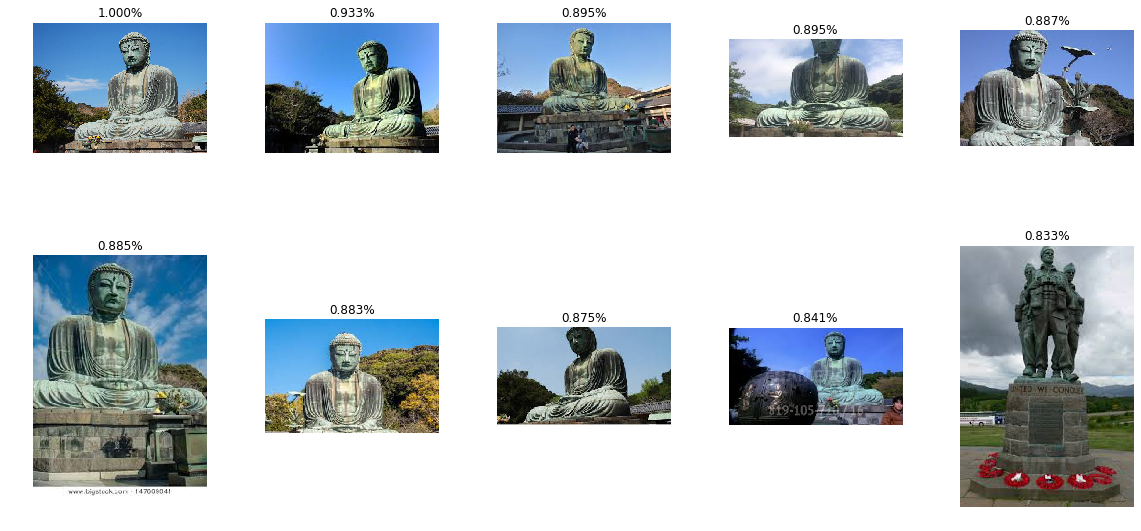

In [6]:
maxres = 10
imlist = [image_list[index] for i, index in enumerate(sort_ind[0:maxres])]
print ("top %d images in order are: " %maxres, imlist)

fig=plt.figure(figsize=(16, 10))
for i in range(len(imlist)):
    sample = imlist[i]
    img = mpimg.imread('./data' + '/' + sample)
    #ax = plt.subplot(figsize)
    ax = fig.add_subplot(2, 5, i+1)
    ax.autoscale()
    plt.tight_layout()
    plt.imshow(img, interpolation='nearest')
    ax.set_title('{:.3f}%'.format(scores[i]))
    ax.axis('off')
plt.show()
